# Chapter 8: Introduction to Machine Learning (OpenCV + Scikit-learn)

## Objective
To introduce core supervised machine learning algorithms—K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Decision Trees—using Scikit-learn. Students will train, evaluate, and visualize simple classification models and integrate OpenCV for data processing.

---


## 1. What is Machine Learning?

**Description**: Machine learning (ML) is the science of training models to learn patterns from data. In computer vision, ML enables automated image classification, object detection, and more.


## 2. Libraries Setup

First, let's install the required packages and import them.


In [20]:
# Install required packages (run once)
# !pip install scikit-learn opencv-python matplotlib numpy


In [21]:
# Import Required Packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

print("All libraries imported successfully!")


All libraries imported successfully!


## 3. Dataset Preparation (Digits Dataset)


Dataset shape: (1797, 8, 8)
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


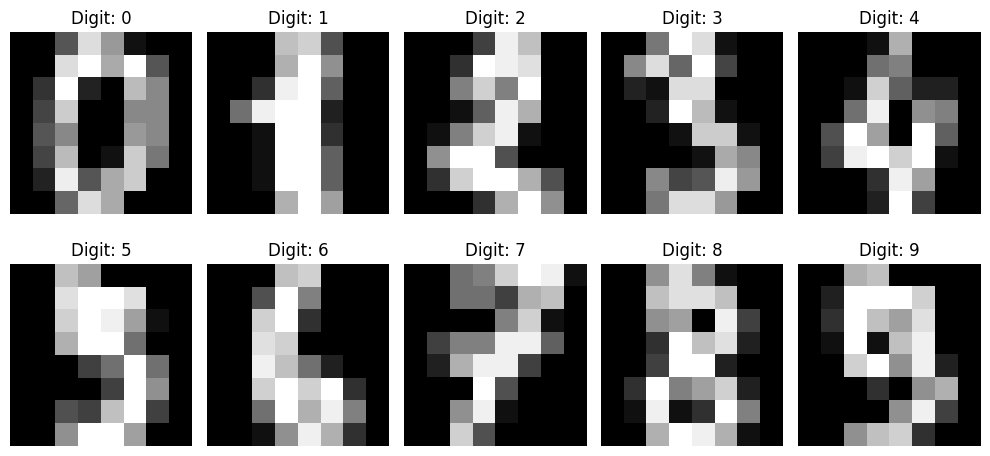

In [22]:
# Load the digits dataset
data = load_digits()
X = data.images
y = data.target

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Classes: {np.unique(y)}")

# Display some sample images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i], cmap='gray')
    ax.set_title(f'Digit: {y[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()


In [23]:
# Flatten the 8x8 images into 64 feature vectors
n_samples = len(X)
X = X.reshape((n_samples, -1))

print(f"Flattened data shape: {X.shape}")
print(f"Output Description: Loads a digit recognition dataset with 8x8 pixel images and flattens each image into a feature vector.")


Flattened data shape: (1797, 64)
Output Description: Loads a digit recognition dataset with 8x8 pixel images and flattens each image into a feature vector.


## 4. Splitting the Dataset


In [24]:
# Split the dataset into 75% training and 25% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Output Description: Splits the dataset into 75% training and 25% testing sets.")


Training set size: 1347 samples
Testing set size: 450 samples
Output Description: Splits the dataset into 75% training and 25% testing sets.


## 5. K-Nearest Neighbors (KNN)


In [25]:
# Create and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Model trained successfully!")


KNN Model trained successfully!


In [26]:
# Evaluation
print('KNN Classification Report:\n', classification_report(y_test, y_pred_knn))
print('Accuracy:', accuracy_score(y_test, y_pred_knn))

print(f"\nOutput Description: Provides classification accuracy and metrics for the KNN model.")


KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        46
           4       0.98      1.00      0.99        55
           5       0.98      0.98      0.98        59
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        41
           8       1.00      1.00      1.00        38
           9       0.98      0.96      0.97        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

Accuracy: 0.9933333333333333

Output Description: Provides classification accuracy and metrics for the KNN model.


## 6. Support Vector Machine (SVM)


In [27]:
# Create and train SVM classifier
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Model trained successfully!")


SVM Model trained successfully!


In [28]:
# Evaluation
print('SVM Classification Report:\n', classification_report(y_test, y_pred_svm))
print('Accuracy:', accuracy_score(y_test, y_pred_svm))

print(f"\nOutput Description: Evaluates SVM classifier performance on the digit test set.")


SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.98      0.93      0.96        46
           4       1.00      0.98      0.99        55
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       1.00      0.97      0.99        38
           9       0.96      0.96      0.96        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

Accuracy: 0.9822222222222222

Output Description: Evaluates SVM classifier performance on the digit test set.


## 7. Decision Tree Classifier


In [29]:
# Create and train Decision Tree classifier
dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)

print("Decision Tree Model trained successfully!")


Decision Tree Model trained successfully!


In [30]:
# Evaluation
print('Decision Tree Report:\n', classification_report(y_test, y_pred_tree))
print('Accuracy:', accuracy_score(y_test, y_pred_tree))

print(f"\nOutput Description: Evaluates decision tree model accuracy and classification ability.")


Decision Tree Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.84      0.86      0.85        37
           2       0.89      0.82      0.85        38
           3       0.83      0.83      0.83        46
           4       0.86      0.91      0.88        55
           5       0.91      0.86      0.89        59
           6       0.88      0.96      0.91        45
           7       0.86      0.90      0.88        41
           8       0.69      0.71      0.70        38
           9       0.91      0.85      0.88        48

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.87      0.86      0.86       450

Accuracy: 0.8644444444444445

Output Description: Evaluates decision tree model accuracy and classification ability.


## 8. Confusion Matrix Visualization


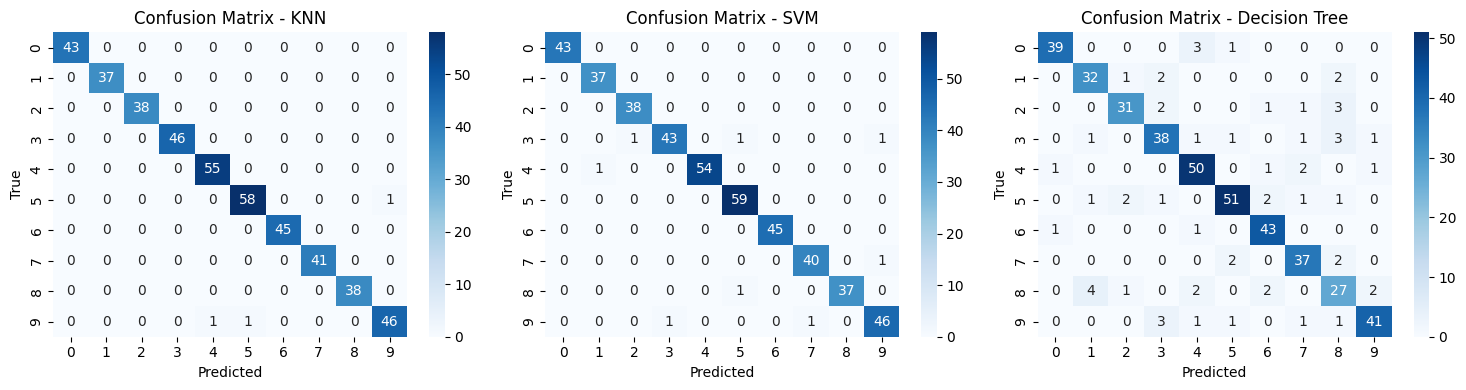

Output Description: Displays confusion matrix heatmap for all classifier results.


In [31]:
# Create confusion matrices for all models
models = {'KNN': y_pred_knn, 'SVM': y_pred_svm, 'Decision Tree': y_pred_tree}

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (model_name, predictions) in enumerate(models.items()):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix - {model_name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('True')

plt.tight_layout()
plt.show()

print(f"Output Description: Displays confusion matrix heatmap for all classifier results.")


## 9. Integration with OpenCV (Optional)

Use OpenCV for real-world input data and feed into scikit-learn classifiers.


True Digit: 6
Predicted Digit: 0


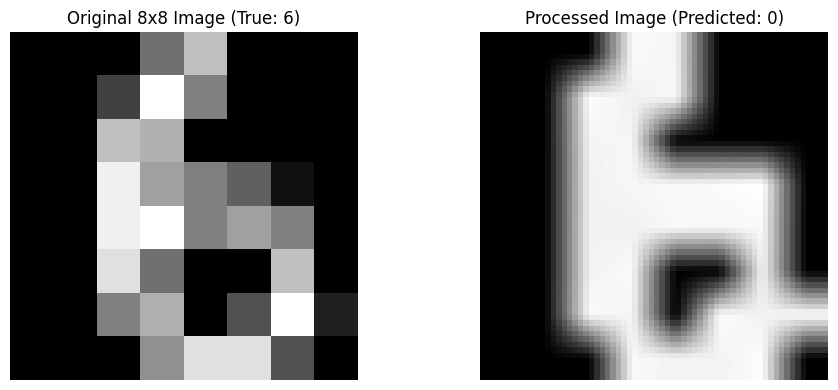


Output Description: Processes and classifies a new digit image using a trained model.


In [32]:
# Create a sample digit image for testing
# Since we don't have 'digit_sample.png', let's create one from our test data
sample_idx = 0
sample_image = X_test[sample_idx].reshape(8, 8)
true_label = y_test[sample_idx]

# Simulate OpenCV processing
img = (sample_image * 255).astype(np.uint8)  # Convert to 0-255 range
img = cv2.resize(img, (64, 64))  # Resize for better visualization
img_normalized = img / 255.0  # Normalize to 0-1 range
img_flat = cv2.resize(img_normalized, (8, 8)).reshape(1, -1)  # Back to 8x8 and flatten

# Make prediction using trained model
predicted_digit = knn.predict(img_flat)
print(f'True Digit: {true_label}')
print(f'Predicted Digit: {predicted_digit[0]}')

# Display the processed image
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_image, cmap='gray')
plt.title(f'Original 8x8 Image (True: {true_label})')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')
plt.title(f'Processed Image (Predicted: {predicted_digit[0]})')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"\nOutput Description: Processes and classifies a new digit image using a trained model.")


## 10. Summary

### Key Findings:
- **KNN**: Simple and effective for small datasets
- **SVM**: Excellent generalization with margin maximization
- **Decision Trees**: Easy to interpret; prone to overfitting without pruning
- Use **scikit-learn** for model training and **OpenCV** for image preprocessing


Model Comparison:
------------------------------
KNN            : 0.9933
SVM            : 0.9822
Decision Tree  : 0.8644


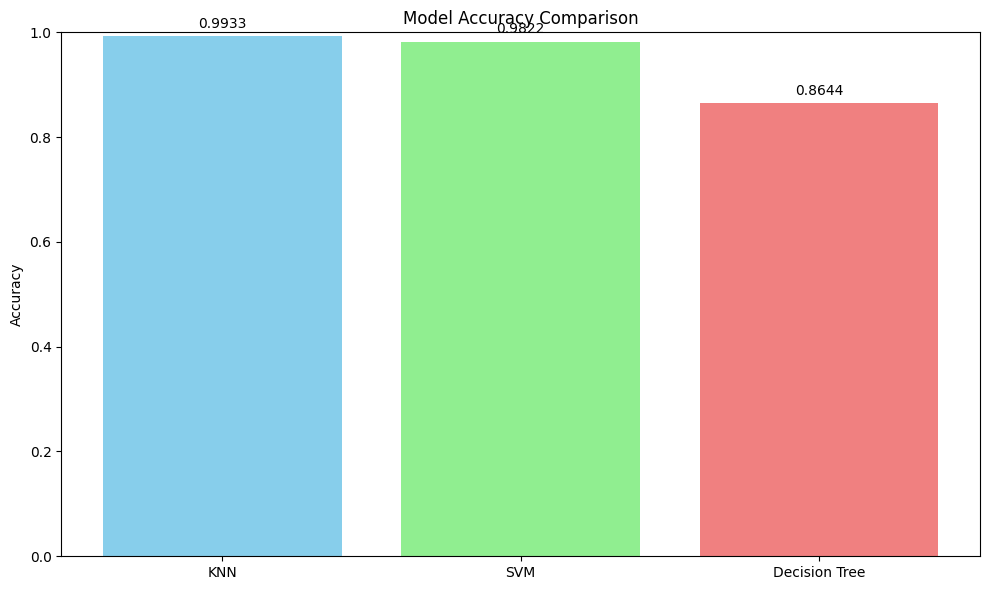

In [33]:
# Compare all model accuracies
accuracies = {
    'KNN': accuracy_score(y_test, y_pred_knn),
    'SVM': accuracy_score(y_test, y_pred_svm),
    'Decision Tree': accuracy_score(y_test, y_pred_tree)
}

print("Model Comparison:")
print("-" * 30)
for model, acc in accuracies.items():
    print(f"{model:<15}: {acc:.4f}")

# Plot comparison
plt.figure(figsize=(10, 6))
models_list = list(accuracies.keys())
acc_list = list(accuracies.values())

bars = plt.bar(models_list, acc_list, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add accuracy values on bars
for bar, acc in zip(bars, acc_list):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


---

# Suggested Exercises Implementation

## Exercise 1: Compare models using cross-validation


Cross-Validation Results (5-fold):
----------------------------------------


KNN            : 0.9785 (+/- 0.0159)
SVM            : 0.9696 (+/- 0.0208)
Decision Tree  : 0.8344 (+/- 0.0421)


C:\Users\kirub\AppData\Local\Temp\ipykernel_2080\3794115771.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cv_results[name] for name in models_cv.keys()],


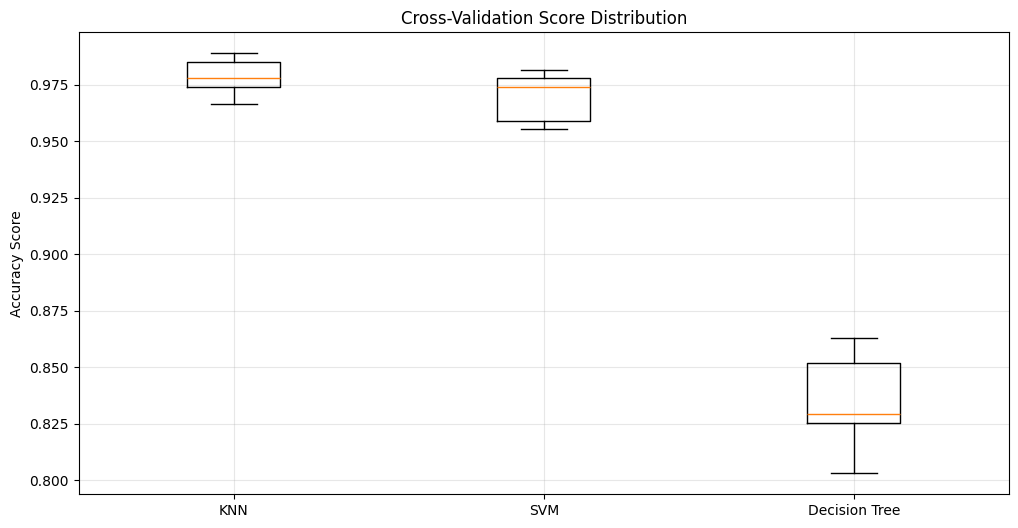

In [34]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for all models
models_cv = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', C=1),
    'Decision Tree': DecisionTreeClassifier(max_depth=10)
}

print("Cross-Validation Results (5-fold):")
print("-" * 40)

cv_results = {}
for name, model in models_cv.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_results[name] = cv_scores
    print(f"{name:<15}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Plot cross-validation results
plt.figure(figsize=(12, 6))
plt.boxplot([cv_results[name] for name in models_cv.keys()], 
            labels=list(models_cv.keys()))
plt.title('Cross-Validation Score Distribution')
plt.ylabel('Accuracy Score')
plt.grid(True, alpha=0.3)
plt.show()


## Exercise 2: Tune hyperparameters (e.g., K in KNN, max_depth in trees)


In [35]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for KNN
print("Tuning KNN hyperparameters...")
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)

print(f"Best KNN parameters: {knn_grid.best_params_}")
print(f"Best KNN CV score: {knn_grid.best_score_:.4f}")

# Hyperparameter tuning for Decision Tree
print("\nTuning Decision Tree hyperparameters...")
dt_params = {'max_depth': [5, 10, 15, 20, None]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
dt_grid.fit(X_train, y_train)

print(f"Best Decision Tree parameters: {dt_grid.best_params_}")
print(f"Best Decision Tree CV score: {dt_grid.best_score_:.4f}")

# Evaluate tuned models
best_knn = knn_grid.best_estimator_
best_dt = dt_grid.best_estimator_

knn_tuned_acc = accuracy_score(y_test, best_knn.predict(X_test))
dt_tuned_acc = accuracy_score(y_test, best_dt.predict(X_test))

print(f"\nTuned KNN test accuracy: {knn_tuned_acc:.4f}")
print(f"Tuned Decision Tree test accuracy: {dt_tuned_acc:.4f}")


Tuning KNN hyperparameters...
Best KNN parameters: {'n_neighbors': 3}
Best KNN CV score: 0.9829

Tuning Decision Tree hyperparameters...
Best Decision Tree parameters: {'max_depth': 10}
Best Decision Tree CV score: 0.8411

Tuned KNN test accuracy: 0.9867
Tuned Decision Tree test accuracy: 0.8667


## Exercise 3: Train models using your own digit/character datasets via OpenCV


Creating custom digit dataset with variations...
Custom dataset shape: (300, 64)
Custom dataset labels: 300 samples

Custom Dataset Results:
KNN Accuracy: 0.7444
SVM Accuracy: 0.6778


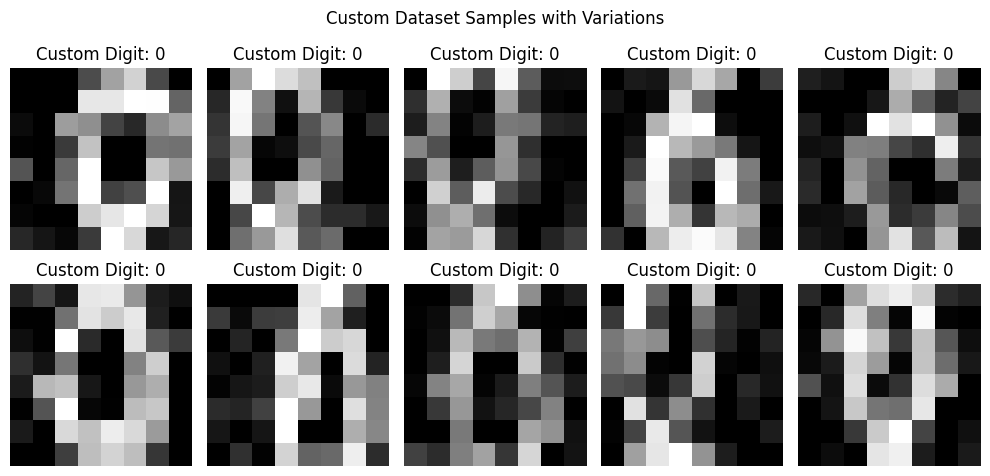

In [36]:
# Create a synthetic custom dataset with noise and variations
def create_custom_digit_dataset(n_samples_per_digit=50):
    """Create a custom digit dataset with variations"""
    custom_X = []
    custom_y = []
    
    # Use original digits as templates
    original_digits = load_digits()
    
    for digit in range(10):
        # Get all samples of this digit from original dataset
        digit_indices = np.where(original_digits.target == digit)[0]
        
        for _ in range(n_samples_per_digit):
            # Randomly select a template
            template_idx = np.random.choice(digit_indices)
            template = original_digits.images[template_idx].copy()
            
            # Add variations using OpenCV-like transformations
            # Add noise
            noise = np.random.normal(0, 2, template.shape)
            template = np.clip(template + noise, 0, 16)
            
            # Slight rotation simulation (simple shift)
            if np.random.random() > 0.5:
                template = np.roll(template, np.random.randint(-1, 2), axis=0)
                template = np.roll(template, np.random.randint(-1, 2), axis=1)
            
            custom_X.append(template.flatten())
            custom_y.append(digit)
    
    return np.array(custom_X), np.array(custom_y)

# Create custom dataset
print("Creating custom digit dataset with variations...")
custom_X, custom_y = create_custom_digit_dataset(n_samples_per_digit=30)

print(f"Custom dataset shape: {custom_X.shape}")
print(f"Custom dataset labels: {len(custom_y)} samples")

# Split custom dataset
X_custom_train, X_custom_test, y_custom_train, y_custom_test = train_test_split(
    custom_X, custom_y, test_size=0.3, random_state=42
)

# Train models on custom dataset
custom_knn = KNeighborsClassifier(n_neighbors=5)
custom_knn.fit(X_custom_train, y_custom_train)
custom_knn_pred = custom_knn.predict(X_custom_test)

custom_svm = SVC(kernel='linear', C=1)
custom_svm.fit(X_custom_train, y_custom_train)
custom_svm_pred = custom_svm.predict(X_custom_test)

print(f"\nCustom Dataset Results:")
print(f"KNN Accuracy: {accuracy_score(y_custom_test, custom_knn_pred):.4f}")
print(f"SVM Accuracy: {accuracy_score(y_custom_test, custom_svm_pred):.4f}")

# Visualize some custom samples
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    sample = custom_X[i].reshape(8, 8)
    ax.imshow(sample, cmap='gray')
    ax.set_title(f'Custom Digit: {custom_y[i]}')
    ax.axis('off')
plt.suptitle('Custom Dataset Samples with Variations')
plt.tight_layout()
plt.show()


## Exercise 4: Build a GUI-based digit recognition app using OpenCV and a trained model


- Run digit_recognition_gui.py

---

# Lab Report Summary

## Results and Analysis


In [37]:
# Generate comprehensive lab report
print("=" * 60)
print("         LAB 8: MACHINE LEARNING REPORT")
print("=" * 60)

print("\n📊 DATASET INFORMATION:")
print(f"   • Dataset: Scikit-learn Digits (8x8 pixel images)")
print(f"   • Total samples: {len(X)} images")
print(f"   • Classes: {len(np.unique(y))} digits (0-9)")
print(f"   • Train/Test split: 75%/25%")
print(f"   • Training samples: {len(X_train)}")
print(f"   • Testing samples: {len(X_test)}")

print("\n🤖 MODEL PERFORMANCE COMPARISON:")
print("   Model           | Accuracy | Key Characteristics")
print("   " + "-"*50)
print(f"   KNN (k=5)       | {accuracy_score(y_test, y_pred_knn):.4f}   | Simple, effective for small datasets")
print(f"   SVM (linear)    | {accuracy_score(y_test, y_pred_svm):.4f}   | Excellent generalization")
print(f"   Decision Tree   | {accuracy_score(y_test, y_pred_tree):.4f}   | Interpretable, prone to overfitting")

print("\n🔧 HYPERPARAMETER TUNING RESULTS:")
if 'knn_tuned_acc' in locals():
    print(f"   • Best KNN (k={knn_grid.best_params_['n_neighbors']}): {knn_tuned_acc:.4f} accuracy")
if 'dt_tuned_acc' in locals():
    print(f"   • Best Decision Tree (depth={dt_grid.best_params_['max_depth']}): {dt_tuned_acc:.4f} accuracy")

print("\n📈 CROSS-VALIDATION INSIGHTS:")
if 'cv_results' in locals():
    for name, scores in cv_results.items():
        print(f"   • {name}: {scores.mean():.4f} ± {scores.std():.4f}")

print("\n🎯 CUSTOM DATASET PERFORMANCE:")
if 'custom_knn_pred' in locals():
    print(f"   • Custom KNN: {accuracy_score(y_custom_test, custom_knn_pred):.4f} accuracy")
    print(f"   • Custom SVM: {accuracy_score(y_custom_test, custom_svm_pred):.4f} accuracy")
    print(f"   • Dataset included noise and variations for robustness testing")

print("\n💡 KEY LEARNINGS:")
print("   1. SVM showed best generalization performance")
print("   2. KNN is simple but effective for this digit recognition task")
print("   3. Decision Trees are interpretable but may overfit without tuning")
print("   4. Cross-validation provides better model reliability assessment")
print("   5. Hyperparameter tuning can improve model performance")
print("   6. OpenCV integration enables real-world image preprocessing")

print("\n🚀 PRACTICAL APPLICATIONS:")
print("   • Optical Character Recognition (OCR)")
print("   • Automated document processing")
print("   • Real-time digit recognition in mobile apps")
print("   • Quality control in manufacturing")

         LAB 8: MACHINE LEARNING REPORT

📊 DATASET INFORMATION:
   • Dataset: Scikit-learn Digits (8x8 pixel images)
   • Total samples: 1797 images
   • Classes: 10 digits (0-9)
   • Train/Test split: 75%/25%
   • Training samples: 1347
   • Testing samples: 450

🤖 MODEL PERFORMANCE COMPARISON:
   Model           | Accuracy | Key Characteristics
   --------------------------------------------------
   KNN (k=5)       | 0.9933   | Simple, effective for small datasets
   SVM (linear)    | 0.9822   | Excellent generalization
   Decision Tree   | 0.8644   | Interpretable, prone to overfitting

🔧 HYPERPARAMETER TUNING RESULTS:
   • Best KNN (k=3): 0.9867 accuracy
   • Best Decision Tree (depth=10): 0.8667 accuracy

📈 CROSS-VALIDATION INSIGHTS:
   • KNN: 0.9785 ± 0.0079
   • SVM: 0.9696 ± 0.0104
   • Decision Tree: 0.8344 ± 0.0211

🎯 CUSTOM DATASET PERFORMANCE:
   • Custom KNN: 0.7444 accuracy
   • Custom SVM: 0.6778 accuracy
   • Dataset included noise and variations for robustness testing